In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
#



import sys
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/MC_studies/Dstlnu_Bt_generic/util_funcs/')
from pandas_plotfuncs import plot_histos_pandas_df, df_call 

In [2]:
nfs_path = "/nfs/dust/belle2/user/axelheim/thesisPlots_data/"
#fourMom_summed_preds.to_csv(nfs_path +  "fourMom_summed_preds_40.5.csv")
fourMom_summed_preds = pd.read_csv(nfs_path +  "fourMom_summed_preds_40.5.csv")

In [3]:
# original notebook
# https://naf-jhub.desy.de/user/axelheim/notebooks/private/baumbauen/notebooks/40.5_ah_createMM2plotFromNNpreds.ipynb
# AND
# git checkout 07ea062d7e4b0901deca0a383a5516920b0432ba

In [4]:
# summed_wrongPred_p_histogram

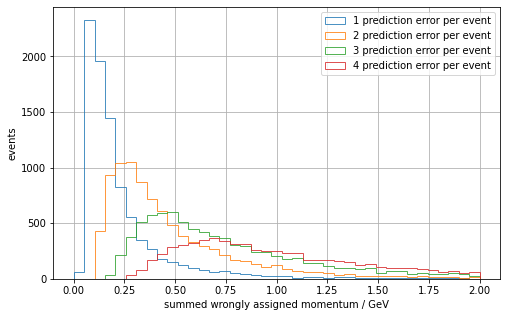

In [5]:
fig, ax = plt.subplots()

bins = np.linspace(0, 2, 40)

#fig.suptitle(r'{}'.format("summed_wrongPred_p"))
fig.set_size_inches(8, 5)

ax.set_xlabel(r'summed wrongly assigned momentum / GeV')
ax.set_ylabel("events")

for i in range(1,5):
    tmp = fourMom_summed_preds[fourMom_summed_preds['num errors']==i]
    N = tmp.shape[0]
    ax.hist(tmp["summed_wrongPred_p"],
            bins=bins,
            density=False, alpha=0.8, label=('{} prediction error per event'.format(i)),histtype='step')

ax.legend()

plt.grid()
plt.savefig('plots/summed_wrongPred_p_histogram.pdf')
#plt.show()

In [6]:
fourMom_summed_preds.keys()

Index(['Unnamed: 0', 'event', 'frac. correct FSPs', 'num corr preds',
       'numFSPs', 'px_summed_bg', 'py_summed_bg', 'pz_summed_bg',
       'E_summed_bg', 'CMSpx_summed_bg', 'CMSpy_summed_bg', 'CMSpz_summed_bg',
       'CMSE_summed_bg', 'px_summed_X', 'py_summed_X', 'pz_summed_X',
       'E_summed_X', 'CMSpx_summed_X', 'CMSpy_summed_X', 'CMSpz_summed_X',
       'CMSE_summed_X', 'px_summed_Bs', 'py_summed_Bs', 'pz_summed_Bs',
       'E_summed_Bs', 'CMSpx_summed_Bs', 'CMSpy_summed_Bs', 'CMSpz_summed_Bs',
       'CMSE_summed_Bs', 'Hc_px', 'Hc_py', 'Hc_pz', 'Hc_E', 'Hc_cmpx',
       'Hc_cmpy', 'Hc_cmpz', 'Hc_cmE', 'Hc_cmPx', 'Hc_cmPy', 'Hc_cmPz',
       'num errors', 'Mbc_Btag', 'MM2recoilSignalSide', 'deltaE',
       'summed_wrongPred_p'],
      dtype='object')

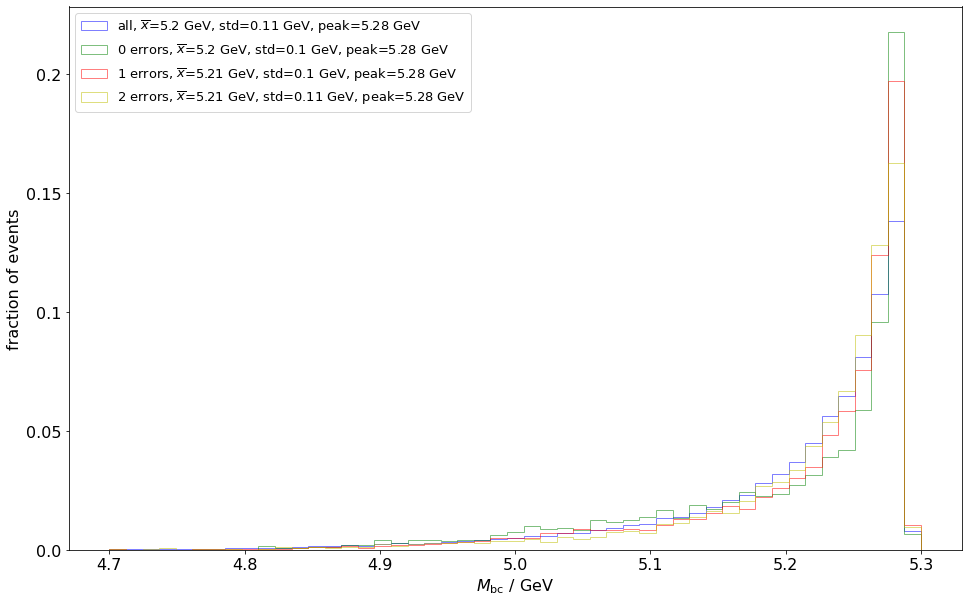

In [7]:
import pylab

tick_factor = 100.0

def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{}'.format(x / tick_factor)
    return s

import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting

fontsize = 16

def plot_histos_pandas_df2(df,col_name,bins,density,title,xlabel,ylabel,save_path,legendpos="right",filter_col='',greater_than=0):
    figsize=(16,10)
    plt.rcParams.update({'font.size': 13})

    fig, ax = plt.subplots()

    fig.set_size_inches(figsize)
    colors = ['b', 'g', 'r', 'y', 'm', 'c', 'k']

    fig.suptitle(title)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    
    
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize)

    yfmt = tkr.FuncFormatter(numfmt)    # create your custom formatter function

    # your existing code can be inserted here

    pylab.gca().yaxis.set_major_formatter(yfmt)
    
    df_tmp = df_call(df,col_name,filter_col,greater_than)
    mean_all = round(df_tmp.mean(),2)
    std_all = round(df_tmp.std(),2)
    num_all = df_tmp.shape[0]

    n, bins, patches = ax.hist(df[col_name],
            bins=bins,
            density=density, alpha=0.0,histtype='step')

    elem = np.argmax(n)
    peak = round((bins[elem] + bins[elem+1])/2.,2)

    
    ax.hist(df_tmp,
            bins=bins,  
            density=density, alpha=0.5, label=(r'all, $\overline{x}$='+ str(mean_all) + ' GeV' + ', std='+ str(std_all) + ' GeV'  + 
                                               ', peak='+str(peak) + ' GeV' ),color=colors[0],histtype='step')
            #density=density, alpha=0.5, label=(r'all, $\overline{x}$='+ str(mean_all) + ', std='+ str(std_all) + 
                                               #', peak='+str(peak)+', N='+str(num_all)),color=colors[0],histtype='step')


    for i in range(3):
        df_tmp = df_call(df,col_name,filter_col,greater_than,filter_errors=True,error=i)
        mean_filter = round(df_tmp.mean(),2)
        std_filter = round(df_tmp.std(),2)
        num_filter = df_tmp.shape[0]
        
        n, bins, patches = ax.hist(df_tmp,
            bins=bins,
            density=density, alpha=0.0,histtype='step')

        elem = np.argmax(n)
        peak_filter = round((bins[elem] + bins[elem+1])/2.,2)


        ax.hist(df_tmp,
                bins=bins,
                density=density, alpha=0.5, label=(str(i) + r' errors, $\overline{x}$='+ str(mean_filter) + ' GeV'  + 
                        ', std='+ str(std_filter) + ' GeV'  + ', peak='+str(peak_filter) + ' GeV')
                ,color=colors[i+1],histtype='step')

                #', std='+ str(std_filter) + ' GeV'  + ', peak='+str(peak_filter) + ' GeV' +', N='+str(num_filter) )
                #,color=colors[i+1],histtype='step')



    from matplotlib.ticker import FormatStrFormatter
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.legend(loc=f'upper {legendpos}')

    plt.savefig(save_path)
    
    
bins = np.linspace(4.7,5.3, 50)
plot_histos_pandas_df2(fourMom_summed_preds,"Mbc_Btag",bins,True,'',r'$M_{\mathrm{bc}}$ / GeV',
                      "fraction of events",'plots/Mbc_Btag.pdf',legendpos="left")    

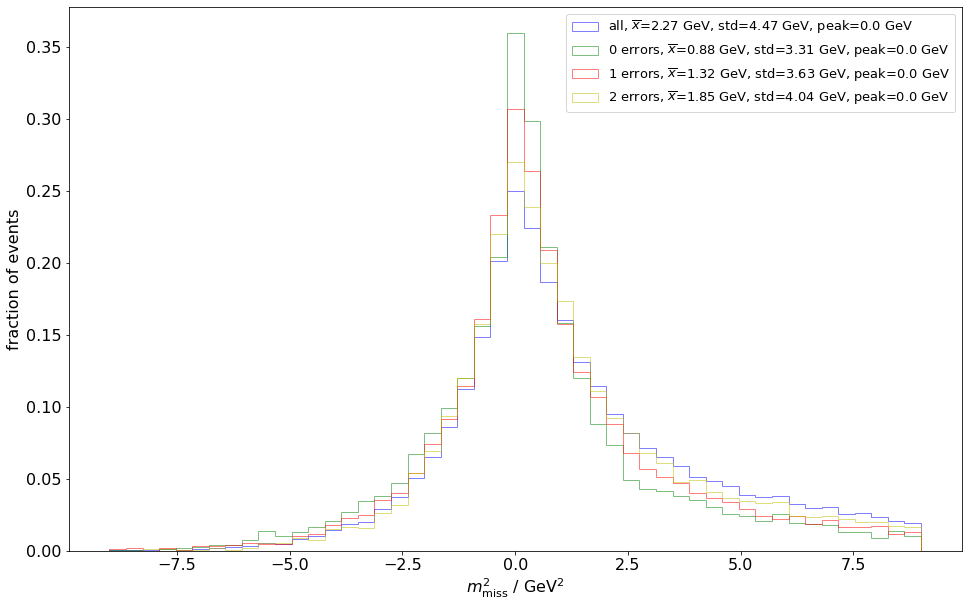

In [8]:
bins = np.linspace(-9,9, 50)

tick_factor = 3.5

def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{}'.format(x / tick_factor)
    return s

import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting


plot_histos_pandas_df(fourMom_summed_preds,"MM2recoilSignalSide",bins,True,"",
                      r'$m_{\mathrm{miss}}^2$ / GeV$^2$',
                      "fraction of events",'plots/MM2recoilSignalSide_MbcCut_5.00GeV.pdf',
                      filter_col='Mbc_Btag',greater_than=5.00)

In [9]:
num_steps=11
steps = [i for i in range(num_steps)]
std=[]
mean=[]
for i in steps:
    df_tmp = fourMom_summed_preds[(fourMom_summed_preds["num errors"]== i)]["MM2recoilSignalSide"]
    mean_filter = round(df_tmp.mean(),2)
    mean.append(mean_filter)
    std_filter = round(df_tmp.std(),2)
    std.append(std_filter)
    
    #print(i,mean_filter,std_filter)

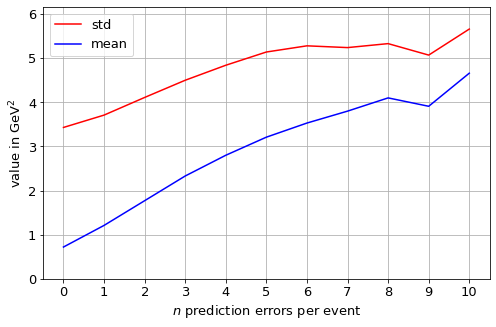

In [10]:
fig, ax = plt.subplots()

fig.suptitle("",fontsize=11)
fig.set_size_inches(8, 5)

ax.set_xlabel(r'$n$ prediction errors per event')
ax.set_ylabel(r'value in GeV$^2$')

plt.xticks(np.arange(0, num_steps, step=1))

ax.set_ylim(0,max(max(std), max(mean)) + 0.5)


ax.plot(steps, std, color ="red", label='std')
ax.plot(steps, mean, color ="blue", label='mean')

ax.legend()

plt.grid()

plt.savefig('plots/nf_dependance_m2_std_mean.pdf')
#plt.show()

<AxesSubplot:>

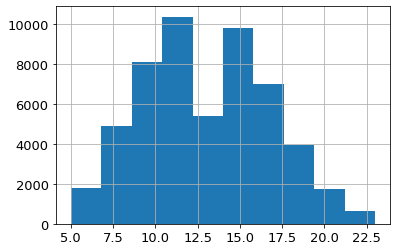

In [11]:
fourMom_summed_preds["numFSPs"].hist()




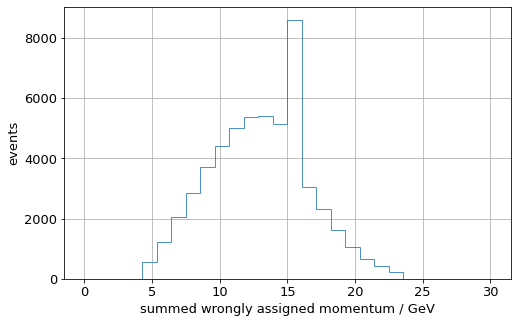

In [12]:
fig, ax = plt.subplots()

bins = np.linspace(0, 30, 29)

#fig.suptitle(r'{}'.format("summed_wrongPred_p"))
fig.set_size_inches(8, 5)

ax.set_xlabel(r'summed wrongly assigned momentum / GeV')
ax.set_ylabel("events")


ax.hist(fourMom_summed_preds["numFSPs"],
            bins=bins,
            density=False, alpha=0.8, label=('data'),histtype='step')

#ax.legend()

plt.grid()
plt.savefig('plots/numFSPs_MCsemiInclusive.pdf')
#plt.show()